In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

### Define File Paths

In [1]:
folder_path = "./dataset/" #change this to your dataset folder
main_path = folder_path + "main/"
train_path = folder_path + "train/"
test_path = folder_path + "test/"
train_chars_path = folder_path + "train_chars/"
test_chars_path = folder_path + "test_chars/"

def show(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

### Load Test Data

In [3]:
# Load Dataset

IMG_SIZE = (64, 64)
batch_size = 32

test_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

test_generator = test_data.flow_from_directory(
    test_chars_path,
    target_size=IMG_SIZE,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 12010 images belonging to 36 classes.


## Load Model

In [9]:
model_path_name="captcha-model-7L-large.keras"
checkpoints_path_name="checkpoints-7L-large/epoch-35-val_loss-0.69.weights.h5"

#### Load the model directly if it exists

In [5]:
from tensorflow.keras.models import load_model

model = load_model(model_path_name)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 32)     │           12

 Total params: 3,921,358 (14.96 MB)

 Trainable params: 1,306,436 (4.98 MB)

 Non-trainable params: 2,048 (8.00 KB)

 Optimizer params: 2,612,874 (9.97 MB)

#### Load weights by redefining model
Note that if we want Grad-CAM visualisations we have to use this method due to some keras errors. This means knowing the structure of the model. If this is not known, we can load the model normally and get the summary before defining it and loading its weights from a checkpoint.

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU

num_classes = 36
input_shape = (64, 64, 1)
model = Sequential([
    
    # 1st Conv Block
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)),
    BatchNormalization(),
    Dropout(0.2),
    
    # 2nd Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    # 3rd Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.2),

    # 4th Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    # 5th Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.2),

    # 6th Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.2),

    # 7th Convolutional Block
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    # Fully Connected Block
    Flatten(),

    Dense(512),
    LeakyReLU(alpha=0.25),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128),
    LeakyReLU(alpha=0.25),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(num_classes, activation='softmax')
])

model.load_weights(checkpoints_path_name)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(
    optimizer=optimizer, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

## Evaluate Metrics

In [11]:
eval_chars_path = folder_path + "eval/"
heatmap_filename = 'q_20.png'

### Basic Metrics

In [12]:
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np
# Evaluate

model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',  # or binary_crossentropy for binary classification
    metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'accuracy']
)


# Evaluate on test data
test_loss, test_precision, test_recall, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")



/Users/asher/Desktop/y4s1/cs4243/CS4243-Mini-Project/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


376/376 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.7943 - loss: 1.1854 - precision: 0.8209 - recall: 0.7835
Test Accuracy: 79.51%
Precision: 0.8223
Recall: 0.7839


### Single Letter Predictions

In [13]:
# Sanity Check for predictions
import os
from tensorflow.keras.preprocessing import image

class_labels = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
    10:"a",
    11:"b",
    12:"c",
    13:"d",
    14:"e",
    15:"f",
    16:"g",
    17:"h",
    18:"i",
    19:"j",
    20:"k",
    21:"l",
    22:"m",
    23:"n",
    24:"o",
    25:"p",
    26:"q",
    27:"r",
    28:"s",
    29:"t",
    30:"u",
    31:"v",
    32:"w",
    33:"x",
    34:"y",
    35:"z"
}

data_files = os.listdir(eval_chars_path)

total = 0
correct = 0

for filename in data_files:
    img_path = os.path.join(eval_chars_path, filename)
    label = filename.split('_')[0]
    img = image.load_img(img_path, target_size=IMG_SIZE, color_mode='grayscale')
    img = image.img_to_array(img) / 255.0
    print(img.shape)
    img = np.expand_dims(img, axis=0)
    classes = model.predict(img)
    predicted_class = np.argmax(classes)
    predicted_label = class_labels[predicted_class]

    print(f'Predicted class label: {predicted_label}, vs Actual label: {label}')
    if predicted_label == label:
        correct += 1
    total += 1

print(f"{correct}/{total}")

(64, 64, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted class label: t, vs Actual label: t
(64, 64, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted class label: e, vs Actual label: e
(64, 64, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted class label: g, vs Actual label: g
(64, 64, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted class label: t, vs Actual label: t
(64, 64, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted class label: 1, vs Actual label: 1
(64, 64, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted class label: q, vs Actual label: q
(64, 64, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted class label: y, vs Actual label: y
(64, 64, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted class label: w, vs Actual label: w
(64, 64, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted class label: f, vs Actual label: f
(64, 64, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted class label: y, vs Actual label: y
(64, 64, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Pr

(64, 64, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted class label: q, vs Actual label: q


/Users/asher/Desktop/y4s1/cs4243/CS4243-Mini-Project/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_598']. Received: the structure of inputs=*
  warnings.warn(


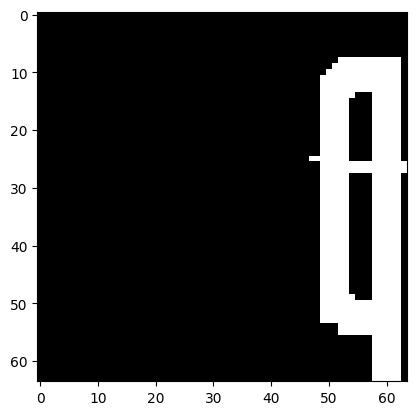

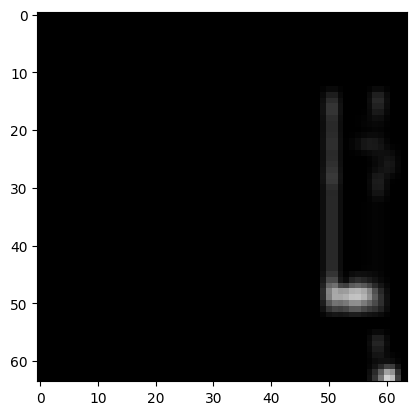

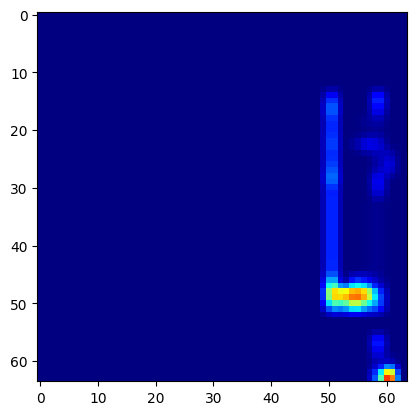

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import cv2


class_labels = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
    10:"a",
    11:"b",
    12:"c",
    13:"d",
    14:"e",
    15:"f",
    16:"g",
    17:"h",
    18:"i",
    19:"j",
    20:"k",
    21:"l",
    22:"m",
    23:"n",
    24:"o",
    25:"p",
    26:"q",
    27:"r",
    28:"s",
    29:"t",
    30:"u",
    31:"v",
    32:"w",
    33:"x",
    34:"y",
    35:"z"
}

img_path = os.path.join(eval_chars_path, heatmap_filename)
label = heatmap_filename.split('_')[0]
img = image.load_img(img_path, target_size=IMG_SIZE, color_mode='grayscale')
img = image.img_to_array(img) / 255.0
print(img.shape)
img = np.expand_dims(img, axis=0)
classes = model.predict(img)
predicted_class = np.argmax(classes)
predicted_label = class_labels[predicted_class]

print(f'Predicted class label: {predicted_label}, vs Actual label: {label}')


def generate_grad_cam(model, img, last_conv_layer_name, classifier_layer_name):
    """
    Generate Grad-CAM heatmap for a given input image and model.

    Parameters:
    - model: Trained Keras model
    - img: Preprocessed input image (shape: (1, height, width, channels))
    - last_conv_layer_name: Name of the last convolutional layer
    - classifier_layer_name: Name of the classifier (dense) layer

    Returns:
    - heatmap: Normalized heatmap
    """
    # Create a sub-model to get the outputs of the last conv layer and the classifier
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_layer = model.get_layer(classifier_layer_name)
    iterate = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[last_conv_layer.output, last_layer.output]
    )

    # Run the model with gradient tracking
    with tf.GradientTape() as tape:
        # Ensure the tape watches the image
        inputs = tf.cast(img, tf.float32)  # Ensure proper type
        tape.watch(inputs)

        # Get conv layer output and predictions
        conv_outputs, predictions = iterate(inputs)
        class_idx = tf.argmax(predictions[0])  # Class index of the predicted class
        class_output = predictions[:, class_idx]

    # Calculate gradients of the predicted class with respect to the feature maps
    grads = tape.gradient(class_output, conv_outputs)

    # Compute the importance of each feature map
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Weight the feature maps by the gradients
    conv_outputs = conv_outputs[0]  # Remove batch dimension
    heatmap = tf.reduce_mean(conv_outputs * pooled_grads, axis=-1)

    # Apply ReLU and normalize
    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap)

    return heatmap.numpy()


def overlay_heatmap(img, heatmap, alpha=0.6, colormap=cv2.COLORMAP_JET):
    """
    Overlay heatmap on the original image.

    Parameters:
    - img: Original image (shape: (height, width, channels))
    - heatmap: Heatmap to overlay
    - alpha: Transparency factor for overlay
    - colormap: OpenCV colormap to apply to the heatmap

    Returns:
    - superimposed_img: Image with heatmap overlay
    """
    # Resize heatmap to match the input image size
    heatmap_resized = cv2.resize(heatmap, (img.shape[2], img.shape[1]))
    heatmap_resized = np.uint8(255 * heatmap_resized)
    heatmap_colored = cv2.applyColorMap(heatmap_resized, colormap)

    # Convert image to uint8
    original_img = np.uint8(255 * img[0])  # Assuming img is normalized to [0, 1]

    # Overlay the heatmap on the original image
    # superimposed_img = cv2.addWeighted(original_img, 1 - alpha, heatmap_colored, alpha, 0)
    show(original_img)
    show(heatmap_resized)
    show(heatmap_colored)
    

    # return superimposed_img

# Define layer names
last_conv_layer_name = 'conv2d_16'  # Replace with the name of your last conv layer
classifier_layer_name = 'dense_8'  # Replace with your classifier layer name

# Generate heatmap
heatmap = generate_grad_cam(model, img, last_conv_layer_name, classifier_layer_name)

# Overlay heatmap on the image
superimposed_img = overlay_heatmap(img, heatmap)

# Display the result
# plt.imshow(superimposed_img)
# plt.axis('off')
# plt.show()
